## Heterogeneous (degree-based) mean-field model on networks

# Question 2a

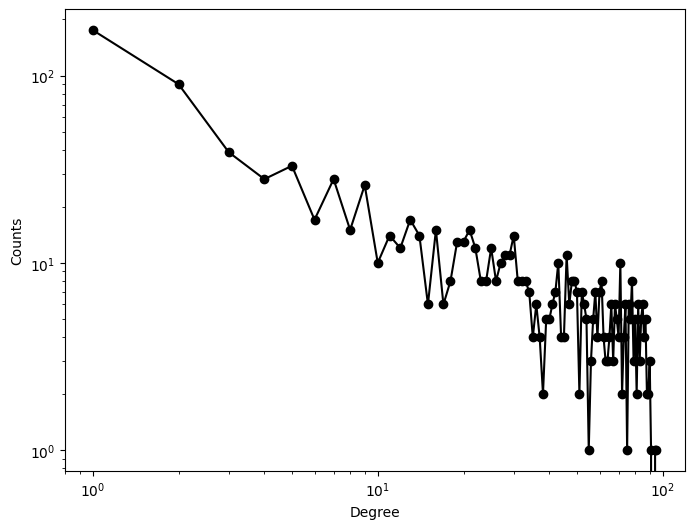

In [1]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import networkx as nx

# generate degree dist (From Max Perrotto)
degree_dist = scipy.stats.powerlaw.rvs(a=(1/3), loc = 0, scale = 100, size = 1000)
degree_dist = [round(n)+1 for n in degree_dist]
if np.sum(degree_dist) % 2 != 0:
    degree_dist[0] += 1
G = nx.configuration_model(degree_dist, create_using=nx.Graph())
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 6))
plt.loglog(degrees[1:], degree_freq[1:],'ko-')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.show()

# Question 2a

In [2]:
import numpy as np

# Parameters of the model
beta = 0.0025 #transmission rate
alpha = 0.01 #recovery rate

I0 = 0.01 #initial fraction of infected nodes
S0 = 1.0 - I0
# R0 = 0.0

# Initial conditions
G_deg_sum = [a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))]
total_degree = np.sum(G_deg_sum)
avg_k = np.sum(G_deg_sum) / G.number_of_nodes()
print(avg_k)
Sk = np.zeros((len(degree_freq))) #array for expected S_k
Ik = np.zeros((len(degree_freq))) #array for expected I_k
# Rk = np.zeros((len(degree_freq))) #array for expected R_k

for k in range(len(degree_freq)):
  #set an expectation of I0 fraction of nodes of degree k infectious
  Sk[k] = degree_freq[k]*S0
  Ik[k] = degree_freq[k]*I0
  # Rk[k] = degree_freq[k]*R0

24.214


In [3]:
# Run the model

# Discrete steps of Euler's methods
res = [] #list of results
history = []
S = S0; I = I0; #set initial conditions
h = 0.1; #timestep
T = np.arange(1,500/h)
for t in T:

  # Calculate the mean-field
  theta = 0.0
  for k in range(len(degree_freq)):
    theta += k*Ik[k]/total_degree
  history.append(theta)

  # Set initial global quantities
  S = 0.0
  I = 0.0

  # Run Euler's method for all degree classes k
  for k in range(len(degree_freq)):
    # calculate speeds
    delta_Sk = -beta*k*theta*Sk[k] + alpha*Ik[k]
    delta_Ik = beta*k*theta*Sk[k] - alpha*Ik[k]
    # delta_Rk = alpha*Ik[k]
    # update dynamical variables
    Sk[k] += delta_Sk*h #Ik(t+h)
    Ik[k] += delta_Ik*h #Ik(t+h)
    # Rk[k] += delta_Rk*h #R(t+h)
    # update global quantities
    S += Sk[k]
    I += Ik[k]
    # R += Rk[k]
  res.append((S/G.number_of_nodes(),I/G.number_of_nodes()))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
St,It = map(np.array, zip(*res))

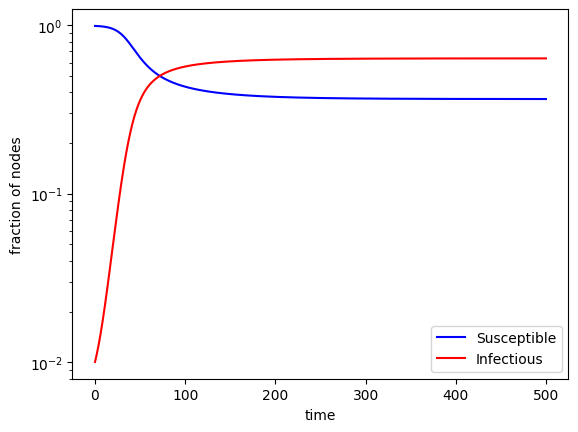

In [4]:
#plot results
fig,ax = plt.subplots()
ax.plot(h*T, St, 'b', label='Susceptible')
ax.plot(h*T,It, 'r', label='Infectious')
#ax.plot(h*T,Rt, 'g', label='Recovered')
ax.legend()
ax.set(yscale='log')
ax.set_xlabel("time")
ax.set_ylabel("fraction of nodes")
plt.show()

#Question 2b

In [5]:
import numpy as np

# Parameters of the model
rho = 0.35
beta = 0.0025 #transmission rate
alpha = 0.01 #recovery rate
vax = 0.4

I0 = 0.01 * (1-vax)#initial fraction of infected nodes
S0 = (1.0 - I0) * (1-vax)

Iv0 = I0 * vax # initial fraction of infected vaccinated nodes
Sv0 = S0 * vax


# Initial conditions
G_deg_sum = [a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))]
total_degree = np.sum(G_deg_sum)
avg_k = np.sum(G_deg_sum) / G.number_of_nodes()
print(avg_k)
Sk = np.zeros((len(degree_freq))) #array for expected S_k
Ik = np.zeros((len(degree_freq))) #array for expected I_k
Svk = np.zeros((len(degree_freq))) #array for expected S_k
Ivk = np.zeros((len(degree_freq))) #array for expected I_k

for k in range(len(degree_freq)):
  #set an expectation of I0 fraction of nodes of degree k infectious
  Sk[k] = degree_freq[k]*S0
  Ik[k] = degree_freq[k]*I0
  Svk[k] = degree_freq[k]*Sv0
  Ivk[k] = degree_freq[k]*Iv0


24.214


In [6]:
# Run the model

# Discrete steps of Euler's methods
res = [] #list of results
history = []
S = S0; I = I0; Sv = Sv0; Iv = Iv0 #set initial conditions
h = 0.1; #timestep
T = np.arange(1,800/h)
for t in T:

  # Calculate the mean-field
  theta = 0.0
  for k in range(len(degree_freq)):
    theta += k*(Ik[k]+(1-rho)*Ivk[k])/total_degree
  history.append(theta)

  # Set initial global quantities
  S = 0.0
  I = 0.0
  Sv = 0.0
  Iv = 0.0

  # Run Euler's method for all degree classes k
  for k in range(len(degree_freq)):
    # calculate speeds
    delta_Sk = -beta*k*theta*Sk[k] + alpha*Ik[k]
    delta_Ik = beta*k*theta*Sk[k] - alpha*Ik[k]
    delta_Svk = -(1-rho)*beta*k*theta*Svk[k] + alpha*Ivk[k]
    delta_Ivk = (1-rho)*beta*k*theta*Svk[k] - alpha*Ivk[k]



    # update dynamical variables
    Sk[k] += delta_Sk*h #Ik(t+h)
    Ik[k] += delta_Ik*h #Ik(t+h)
    Svk[k] += delta_Svk*h #Ik(t+h)
    Ivk[k] += delta_Ivk*h #Ik(t+h)

    # update global quantities
    S += Sk[k]
    I += Ik[k]
    Sv += Svk[k]
    Iv += Ivk[k]

  res.append(((S+Sv)/G.number_of_nodes(),(I+Iv)/G.number_of_nodes()))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
St,It = map(np.array, zip(*res))

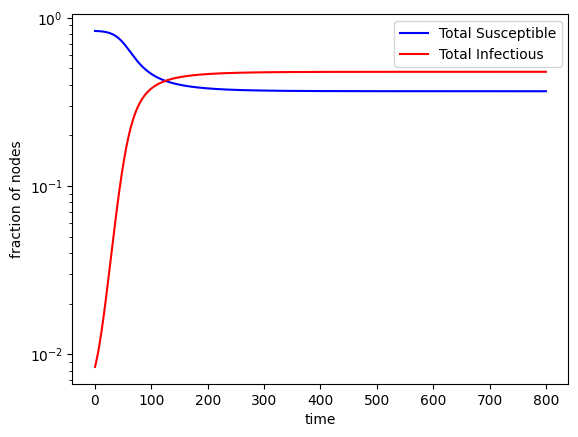

In [7]:
#plot results
fig,ax = plt.subplots()
ax.plot(h*T, St, 'b', label='Total Susceptible')
ax.plot(h*T,It, 'r', label='Total Infectious')

#ax.plot(h*T,Rt, 'g', label='Recovered')
ax.legend()
ax.set(yscale='log')
ax.set_xlabel("time")
ax.set_ylabel("fraction of nodes")
plt.show()

# Question 2c

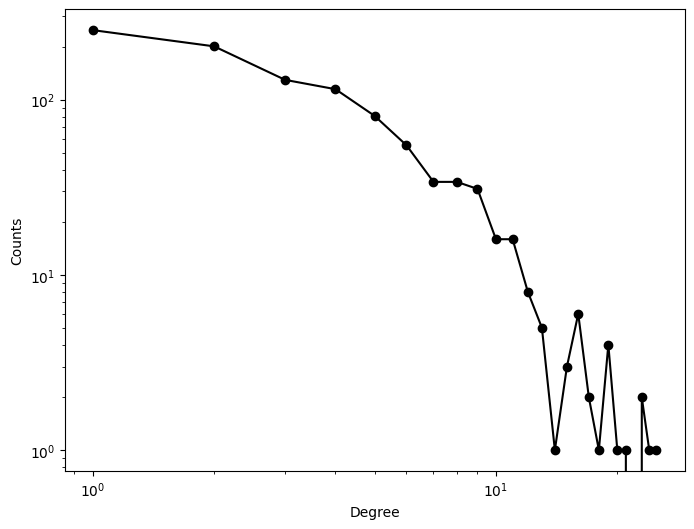

In [8]:


# Sampled geometric distribution
import numpy as np
import networkx as nx

# Set the parameters for the geometric distribution
p = 1/4
n = 1000  # Number of nodes

# Generate a degree sequence that follows the geometric distribution
degree_dist = np.random.geometric(p, n)
if np.sum(degree_dist) % 2 != 0:
    degree_dist[1] += 1                                                               #[1] instead of 0


G = nx.configuration_model(list(degree_dist), create_using=nx.Graph())
degree_freq = nx.degree_histogram(G)


# Plot the degree distribution
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 6))
plt.loglog(degrees[1:], degree_freq[1:], 'ko-')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.show()





3.944
3.944
3.944
3.944
3.944
3.944
3.944
3.944
3.944
3.944
3.944


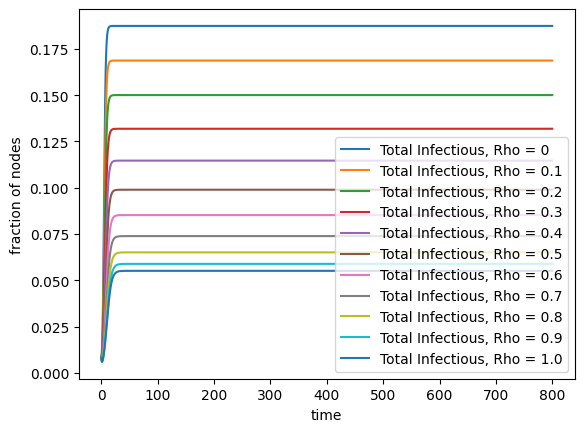

In [9]:
import numpy as np

# Run the model for each rho
rhos = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fig, ax = plt.subplots()

beta = 0.30 #transmission rate
alpha = 1 #recovery rate
vax = .40

I0 = 0.01*(1-vax) #initial fraction of infected nodes
S0 = (1.0 - I0) * (1-vax)

Iv0 = I0 * vax # initial fraction of infected vaccinated nodes
Sv0 = S0 * vax

for rho in rhos:
  # Initial conditions
  G_deg_sum = [a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))]
  total_degree = np.sum(G_deg_sum)
  avg_k = np.sum(G_deg_sum) / G.number_of_nodes()
  print(avg_k)
  Sk = np.zeros((len(degree_freq))) #array for expected S_k
  Ik = np.zeros((len(degree_freq))) #array for expected I_k
  Svk = np.zeros((len(degree_freq))) #array for expected S_k
  Ivk = np.zeros((len(degree_freq))) #array for expected I_k

  for k in range(len(degree_freq)):
    #set an expectation of I0 fraction of nodes of degree k infectious
    Sk[k] = degree_freq[k]*S0
    Ik[k] = degree_freq[k]*I0
    Svk[k] = degree_freq[k]*Sv0
    Ivk[k] = degree_freq[k]*Iv0


  # Run the model

  # Discrete steps of Euler's methods
  res = [] #list of results
  history = []
  S = S0; I = I0; Sv = Sv0; Iv = Iv0 #set initial conditions
  h = 0.1; #timestep
  T = np.arange(1,800/h)
  for t in T:

    # Calculate the mean-field
    theta = 0.0
    for k in range(len(degree_freq)):
      theta += k*(Ik[k]+(1-rho)*Ivk[k])/total_degree
    history.append(theta)

    # Set initial global quantities
    S = 0.0
    I = 0.0
    Sv = 0.0
    Iv = 0.0

    # Run Euler's method for all degree classes k
    for k in range(len(degree_freq)):
      # calculate speeds
      delta_Sk = -beta*k*theta*Sk[k] + alpha*Ik[k]
      delta_Ik = beta*k*theta*Sk[k] - alpha*Ik[k]
      delta_Svk = -(1-rho)*beta*k*theta*Svk[k] + alpha*Ivk[k]
      delta_Ivk = (1-rho)*beta*k*theta*Svk[k] - alpha*Ivk[k]

      # update dynamical variables
      Sk[k] += delta_Sk*h #Ik(t+h)
      Ik[k] += delta_Ik*h #Ik(t+h)
      Svk[k] += delta_Svk*h #Ik(t+h)
      Ivk[k] += delta_Ivk*h #Ik(t+h)

      # update global quantities
      S += Sk[k]
      I += Ik[k]
      Sv += Svk[k]
      Iv += Ivk[k]

    res.append(((S+Sv)/G.number_of_nodes(),(I+Iv)/G.number_of_nodes()))

  #zip unpacked list of tuples (n-th elements all together)
  #map them to arrays
  St,It = map(np.array, zip(*res))

  # ax.plot(h*T, St, 'b', label='Total Susceptible')
  ax.plot(h * T, It, label=f'Total Infectious, Rho = {rho}')

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("fraction of nodes")
plt.show()

# Question 2d

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Set the parameters for the geometric distribution
p = 1/4
n = 1000  # Number of nodes

# Generate a degree sequence that follows the geometric distribution
degrees = np.random.geometric(p, n)
total_degrees = np.sum(degrees)
if total_degrees % 2 != 0:
    degrees[0] += 1

G = nx.configuration_model(degrees, create_using=nx.Graph())
degree_freq = nx.degree_histogram(G)
degree_freq_reverse = degree_freq[::-1]

# Get top_40
top_40 = []
current_sum = 0
for entry in degree_freq_reverse:
    if current_sum + entry <= 400:
        top_40.append(entry)
        current_sum += entry
    else:
        break

# get bottom_60
bottom_60 = [entry for entry in degree_freq_reverse if entry not in top_40]

degree_freq_unvax = bottom_60
degree_freq_vax = top_40


# # Sanity checks
# np.sum(degree_freq_unvax + degree_freq_vax)
# print(top_40)
# print(degree_freq_reverse)
# print(bottom_60)


7.318
7.318
7.318
7.318
7.318
7.318
7.318


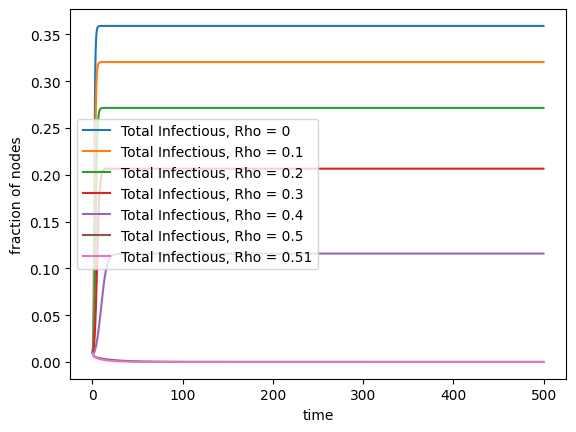

In [11]:
# Run the model for each rho
rhos = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.51]
fig, ax = plt.subplots()

# Parameters of the model
beta = 0.3  # transmission rate
alpha = 1  # recovery rate
vax = 0.40

I0 = 0.01  # initial fraction of infected nodes
S0 = (1.0 - I0)

Iv0 = I0  # initial fraction of infected vaccinated nodes
Sv0 = S0

for rho in rhos:
    # Initial conditions
    G_deg_sum = [a * b for a, b in zip(degree_freq_unvax + degree_freq_vax, range(0, len(degree_freq_unvax + degree_freq_vax)))]
    total_degree = np.sum(G_deg_sum)
    avg_k = np.sum(G_deg_sum) / G.number_of_nodes()
    print(avg_k)
    Sk = np.zeros((len(degree_freq_unvax)))  # array for expected S_k
    Ik = np.zeros((len(degree_freq_unvax)))  # array for expected I_k
    Svk = np.zeros((len(degree_freq_vax)))  # array for expected S^v_k
    Ivk = np.zeros((len(degree_freq_vax)))  # array for expected I^v_k

    for k in range(len(degree_freq_unvax)):
        # set an expectation of I0 fraction of nodes of degree k infectious
        Sk[k] = degree_freq_unvax[k] * S0
        Ik[k] = degree_freq_unvax[k] * I0

    for k in range(len(degree_freq_vax)):
        # set an expectation of I0 fraction of nodes of degree k infectious
        Svk[k] = degree_freq_vax[k] * Sv0
        Ivk[k] = degree_freq_vax[k] * Iv0

    # Discrete steps of Euler's methods
    res = []
    S = S0
    I = I0
    Sv = Sv0
    Iv = Iv0  # set initial conditions
    h = 0.1  # timestep
    T = np.arange(1, 500 / h)

    for t in T:
        # Calculate the mean-field
        theta_unvax = 0.0
        theta_vax = 0.0
        for k in range(len(degree_freq_unvax)):
            theta_unvax += k * (Ik[k]) / total_degree
        for k in range(len(degree_freq_unvax), len(degree_freq_vax)):
            theta_vax += k * ((1 - rho) * Ivk[k]) / total_degree

        theta = theta_unvax + theta_vax

        # Set initial global quantities
        S = 0.0
        I = 0.0
        Sv = 0.0
        Iv = 0.0

        # Run Euler's method for all degree classes k
        for k in range(len(degree_freq_unvax)):
            # calculate speeds
            delta_Sk = -beta * k * theta * Sk[k] + alpha * Ik[k]
            delta_Ik = beta * k * theta * Sk[k] - alpha * Ik[k]

            # update dynamical variables
            Sk[k] += delta_Sk * h
            Ik[k] += delta_Ik * h

            # update global quantities
            S += Sk[k]
            I += Ik[k]

        for k in range(len(degree_freq_unvax), len(degree_freq_vax)):
            # calculate speeds
            delta_Svk = -(1 - rho) * beta * k * theta * Svk[k] + alpha * Ivk[k]
            delta_Ivk = (1 - rho) * beta * k * theta * Svk[k] - alpha * Ivk[k]

            # update dynamical variables
            Svk[k] += delta_Svk * h
            Ivk[k] += delta_Ivk * h

            # update global quantities
            Sv += Svk[k]
            Iv += Ivk[k]
        res.append(((S + Sv) / G.number_of_nodes(), (I + Iv) / G.number_of_nodes()))

    # zip unpacked list of tuples (n-th elements all together)
    # map them to arrays
    St, It = map(np.array, zip(*res))

    ax.plot(h * T, It, label=f'Total Infectious, Rho = {rho}')

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("fraction of nodes")
plt.show()

